In [1]:
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
import math

from pylab import imread,subplot,imshow,title,gray,figure,show

!pwd
data_dir = "/store/TeachJob/AstrometriaI/pythings/clase21/CroppedYale"
os.chdir(data_dir)

/home/mlares/all/TeachJob/AstrometriaI/notebooks


In [2]:
# # converting from svg to png (first time only)
# from glob import glob

# %cd $data_dir

# files=glob('yaleB*/*.pgm')
# print 'number of files is',len(files)
# count=0
# for f in files:
#     new_f=f[:-3]+'png'
#     !convert $f $new_f
#     count += 1
#     if count % 100==0:
#         print count,f,new_f

In [3]:
def image_grid(D,H,W,cols=10,scale=1):
    """ display a grid of images
        H,W: Height and width of the images
        cols: number of columns = number of images in each row
        scale: 1 to fill screen
    """
    n = np.shape(D)[0]
    rows = int(math.ceil((n+0.0)/cols))
    fig = plt.figure(1,figsize=[scale*20.0/H*W,scale*20.0/cols*rows],dpi=300)
    for i in range(n):
        plt.subplot(rows,cols,i+1)
        fig=plt.imshow(np.reshape(D[i,:],[H,W]), cmap = plt.get_cmap("gray"))
        plt.axis('off')

In [4]:
def create_filenames(data_dir, view_list):
    # loads the pictures into a list
    # data_dir: the CroppedYale folder
    # view_list: the views you wish to grab
    dir_list = os.listdir(data_dir)
    file_list = []
    for dir in dir_list:
        for view in view_list:
            filename = "%s/%s_%s.png" % (dir, dir, view)
            file_list.append(filename)
    return(file_list)


view_list = ['P00A+000E+00', 'P00A+005E+10' , 'P00A+005E-10' , 'P00A+010E+00']

file_list = create_filenames(data_dir, view_list)
len(file_list)

152

shape= (192, 168)


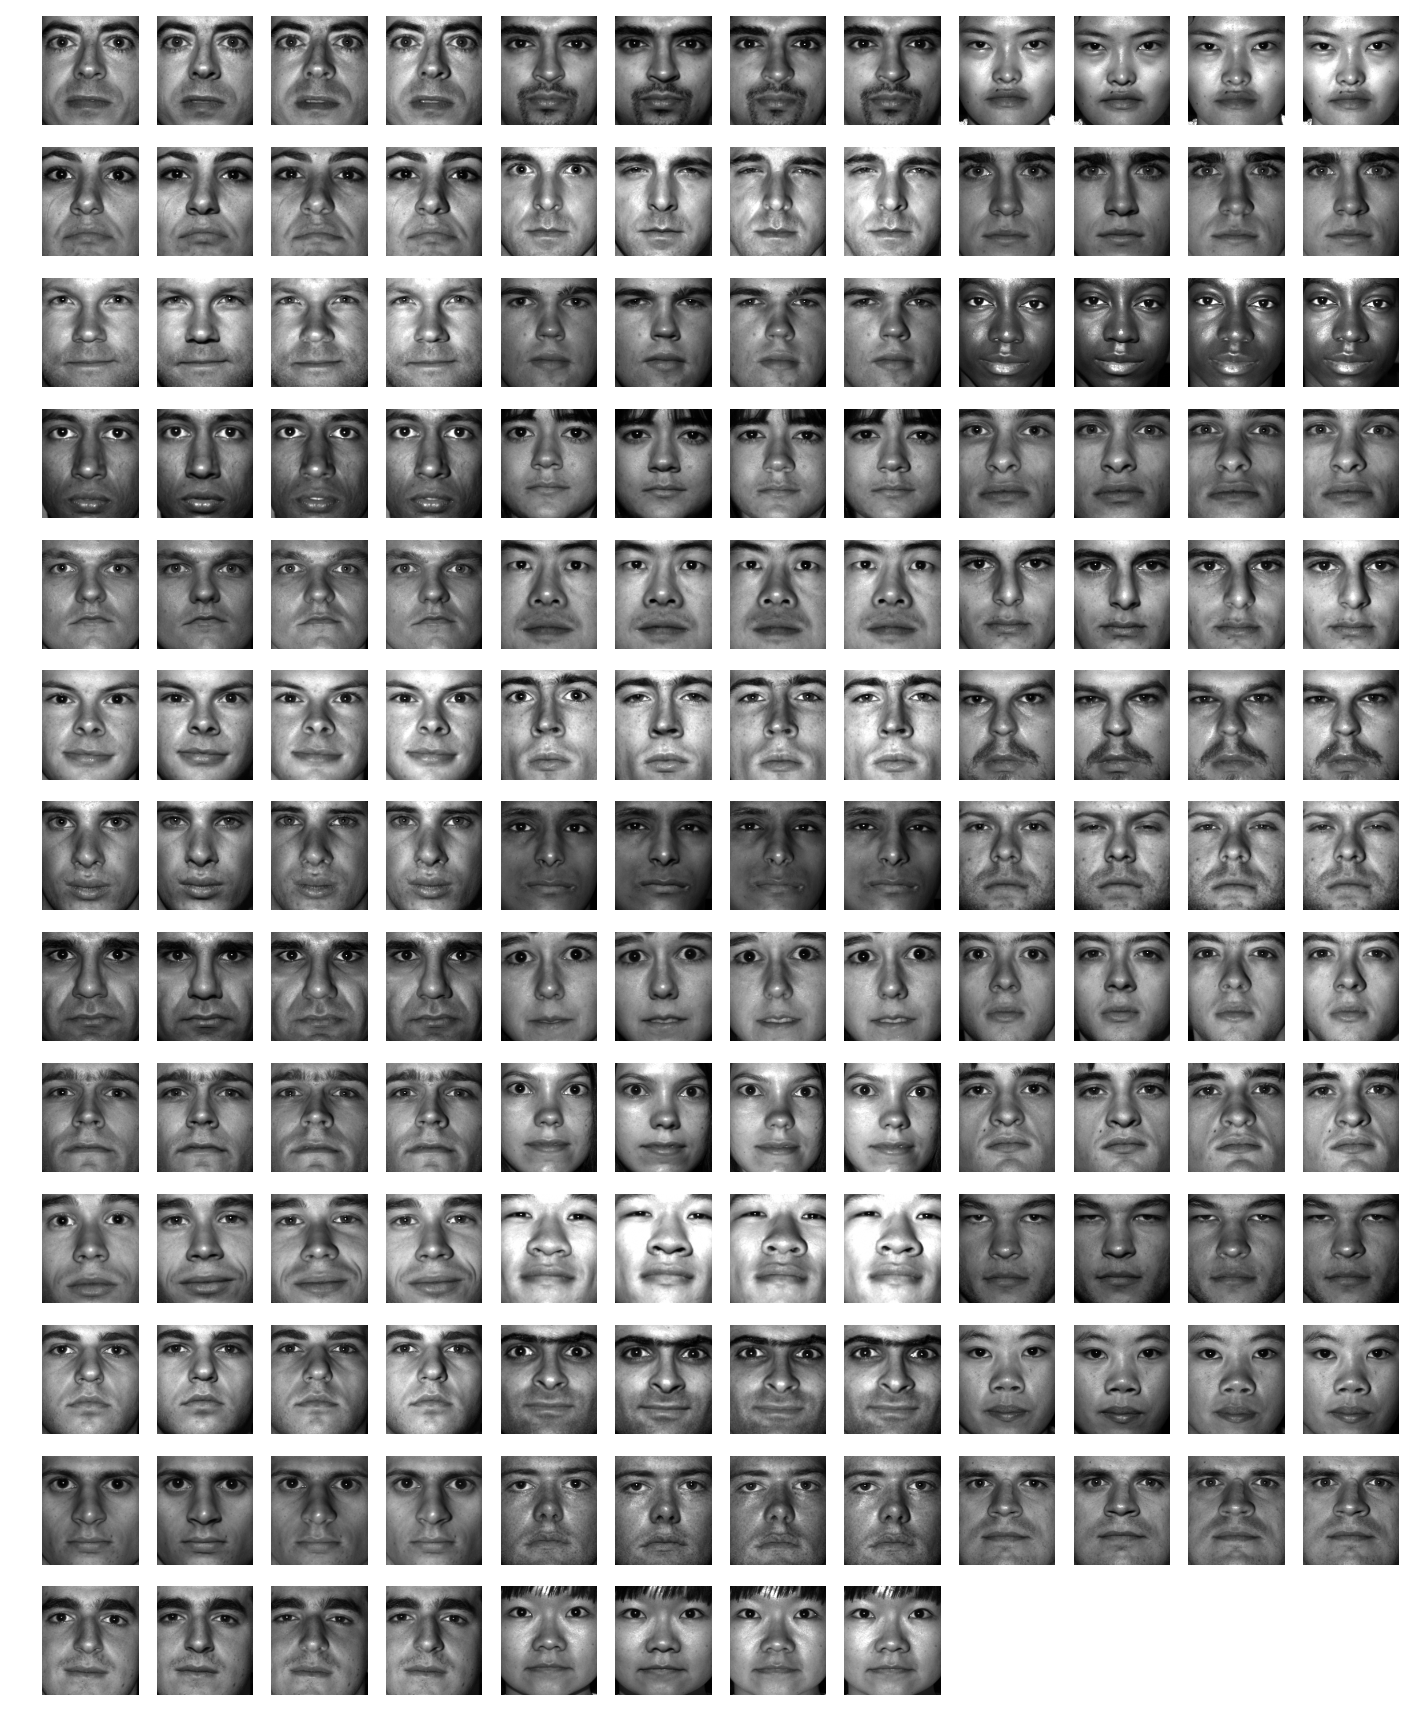

In [5]:
# open image
im = imread(file_list[0])

#im = Image.open(file_list[0]).convert("L")
# get original dimensions
H,W = np.shape(im)
print 'shape=',(H,W)

im_number = len(file_list)
# fill array with rows as image
# and columns as pixels
arr = np.zeros([im_number,H*W])

for i in range(im_number):
    im = imread(file_list[i])
    arr[i,:] = np.reshape(np.asarray(im),[1,H*W])

image_grid(arr,H,W, cols=12)

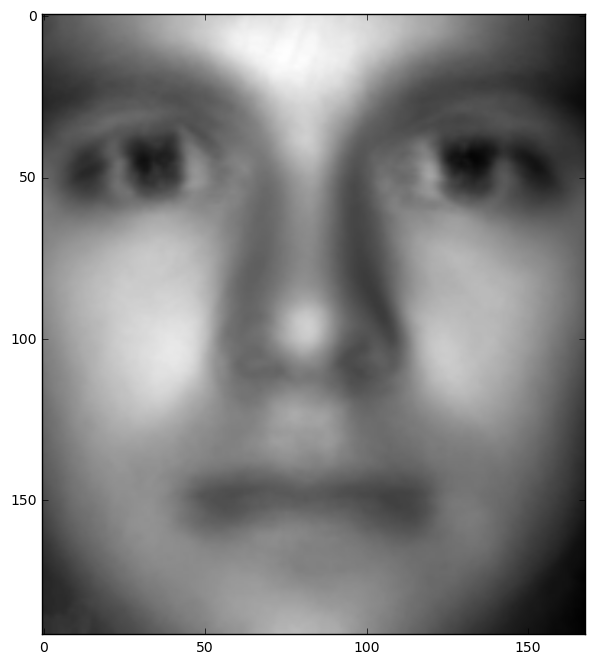

In [6]:
mean_image = np.mean(arr, axis=0)
plt.figure(figsize = (8,8))
plt.imshow(np.reshape(mean_image,[H,W]), cmap = plt.get_cmap("gray"))

In [7]:
# centering the data (subtract mean face)
arr_norm = np.zeros([im_number, H*W])
arr_norm = arr - mean_image

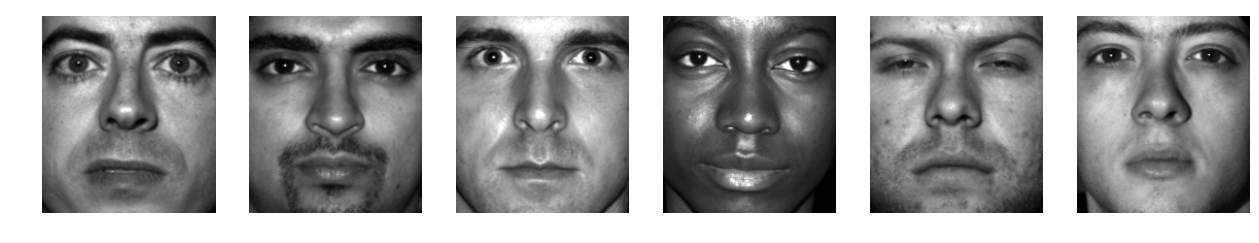

In [8]:
# chose some faces:
idxs = [1,4,16,32,81,95]
# plot some faces
image_grid(arr[idxs,:],H,W, scale=1.5)

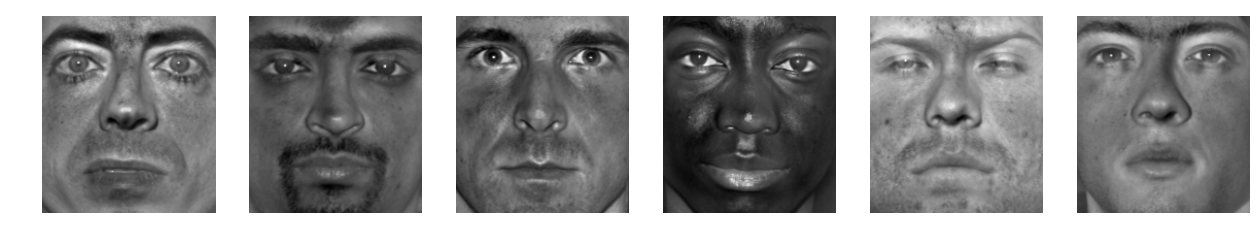

In [9]:
# plot some normalized faces
image_grid(arr_norm[idxs,:],H,W, scale=1.5)

# PCA implementation on python

In [10]:
from sklearn.decomposition.pca import PCA

/store/TeachJob/AstrometriaI/pythings/local/lib/python2.7/site-packages/scipy/sparse/lil.py:19: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/store/TeachJob/AstrometriaI/pythings/local/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:165: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._shortest_path import shortest_path, floyd_warshall, dijkstra,\
/store/TeachJob/AstrometriaI/pythings/local/lib/python2.7/site-packages/scipy/sparse/csgraph/_validation.py:5: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._tools import csgraph_to_dense, csgraph_from_dense,\
/store/TeachJob/AstrometriaI/pythings/local/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:167: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._trave

In [11]:
pca = PCA()
pca.fit(arr_norm)

PCA(copy=True, n_components=None, whiten=False)

### Eigenfaces:

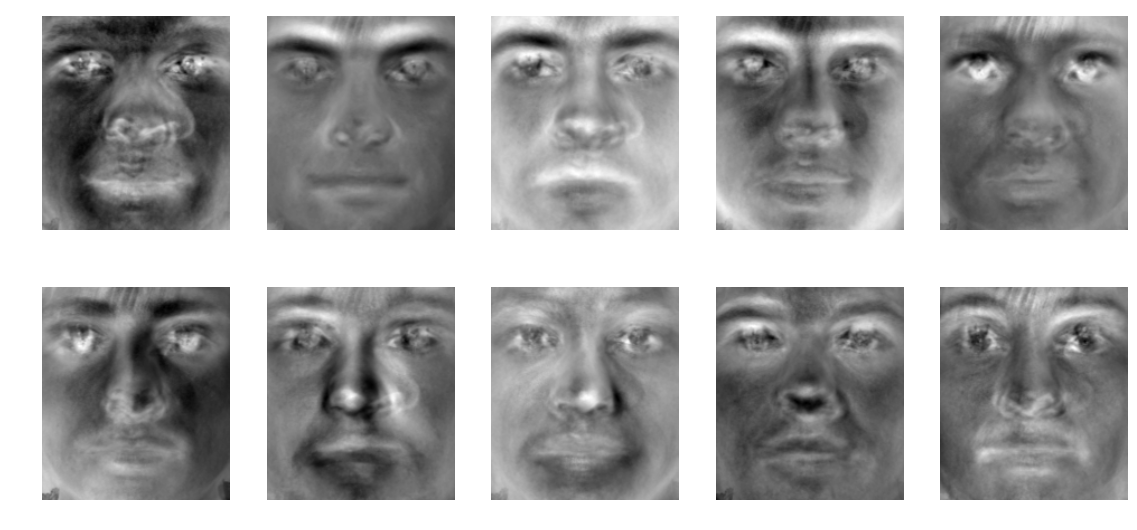

In [12]:
# eigenfaces
eigenfaces = pca.components_
image_grid(eigenfaces[:10,:], H, W, cols=5, scale=0.8)

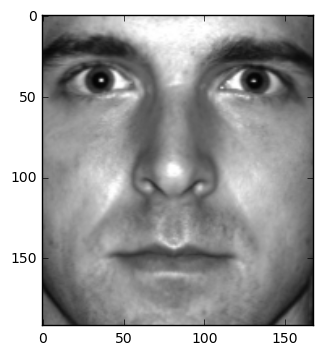

In [13]:
img_idx = file_list.index('yaleB01/yaleB01_P00A+010E+00.png')
img_idx = 16
im = imread(file_list[img_idx])
plt.gray()
plt.imshow(im)

In [14]:
loadings = pca.components_
n_components = loadings.shape[0]
scores = np.dot(arr_norm[:,:], loadings[:,:].T)

img_proj = []
for n in range(n_components):
    proj = np.dot(scores[img_idx, n], loadings[n,:])
    img_proj.append(proj)
len(img_proj)

152

In [15]:
faces = mean_image
face_list = []
face_list.append(mean_image)
for i in range(len(img_proj)):
    faces = np.add(faces, img_proj[i])
    face_list.append(faces)

face_arr = np.asarray(face_list)
face_arr.shape

(153, 32256)

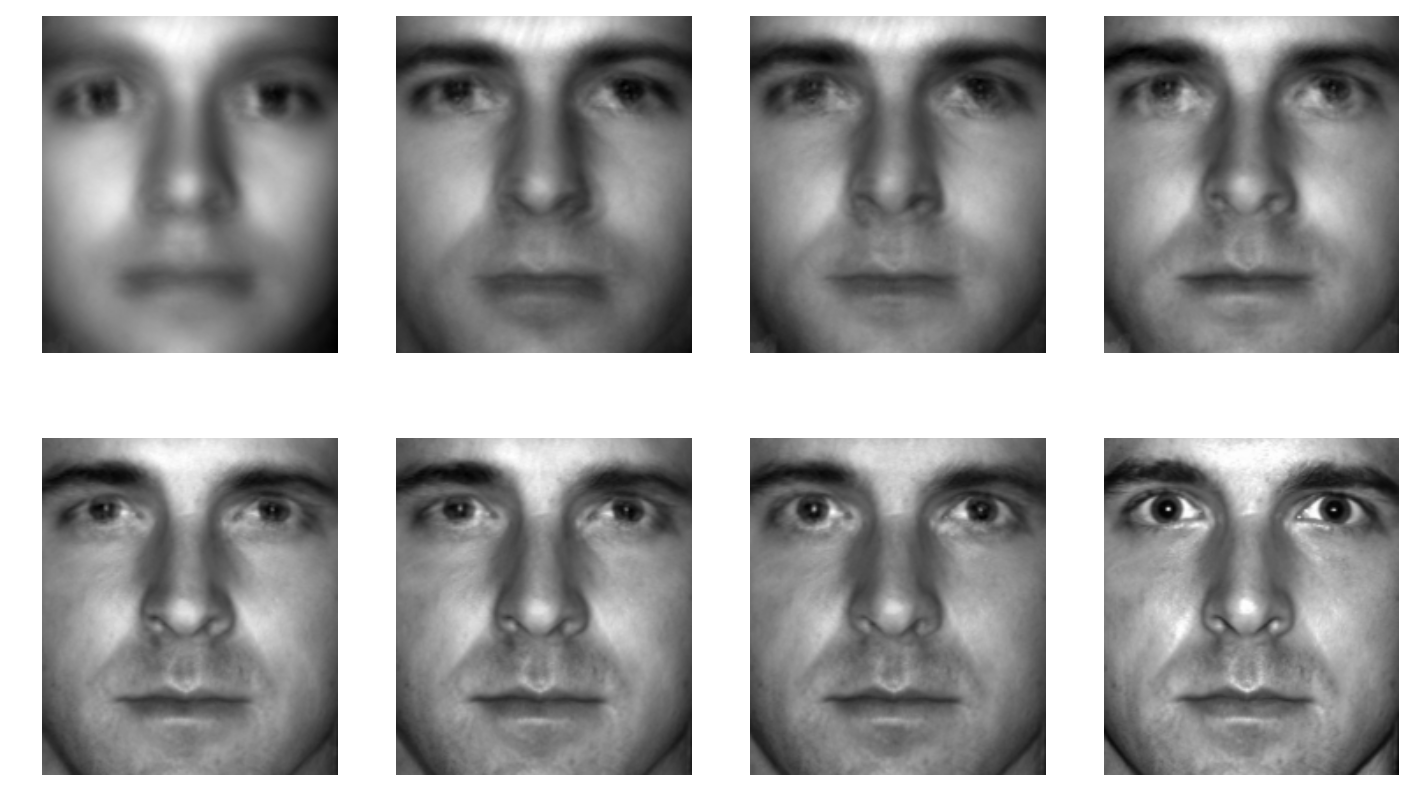

In [16]:
i = [0, 5, 10, 20, 30, 40, 50, 100]
#image_grid(face_arr[:25], H, W, cols=4)
image_grid(face_arr[i], H, W, cols=4)